**Ваша задача:**
1. Исследовать данные
2. Создать тренировочную и тестовую подвыборки
3. Построить модель линейной регрессии по своему набору данных (т.е. создать модель и обучить ее на тренировочной выборке)
4. Получить коэффиценты уравнения линейной регрессии
5. Написать уравнение линейной регрессии
6. Визуализировать данные и полученное уравнение линейной регрессии
7. Оценивать полученную модель с помощью MSE, MAE, R2.
8. Сделать письменный вывод получившихся результатов (хорошая или плохая получлась оценка MSE и почему), привести восстановленное линейное уравнение регрессии, сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему.

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
data = pd.read_csv("happyscore_income.csv")
data.drop("country.1", axis=1, inplace=True)
data.head(10)

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP
0,Armenia,37.0,4.9,2.42,2096.760,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821
1,Angola,26.0,4.3,3.19,1448.880,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778
2,Argentina,60.0,7.1,1.91,7101.120,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351
3,Austria,59.0,7.2,2.11,19457.040,16879.620000,30.296250,'Western Europe',7.200,1.33723
4,Australia,65.0,7.6,1.80,19917.000,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358
5,Azerbaijan,46.0,5.8,2.27,3381.600,2931.480000,24.215000,'Central and Eastern Europe',5.212,1.02389
6,Bangladesh,43.0,5.3,2.10,1265.340,994.140000,32.665000,'Southern Asia',4.694,0.39753
7,Belgium,63.0,7.2,1.72,17168.505,15166.455000,28.745000,'Western Europe',6.937,1.30782
8,Burkina Faso,37.0,4.4,2.02,870.840,630.240000,39.760000,'Sub-Saharan Africa',3.587,0.25812
9,Bulgaria,34.0,4.6,2.57,5354.820,4523.565000,34.162500,'Central and Eastern Europe',4.218,1.01216


Число объектов - 111, Число признаков - 10


<Figure size 1080x648 with 0 Axes>

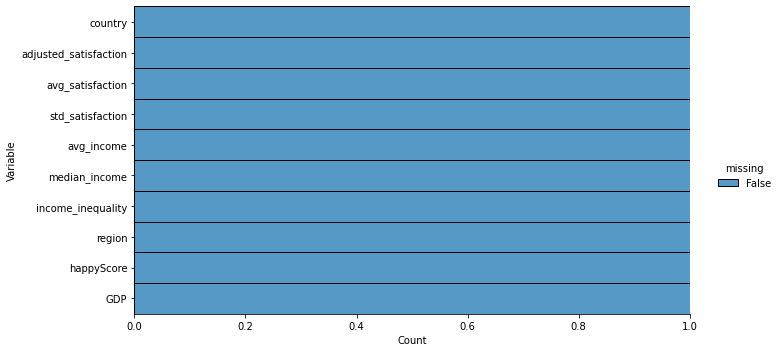

In [15]:
print(f"Число объектов - {data.shape[0]}, Число признаков - {data.shape[1]}")

plt.figure(figsize=(15,9))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)
plt.xlabel("Count")
plt.ylabel("Variable")
plt.show()
# Пропущенных значений нет

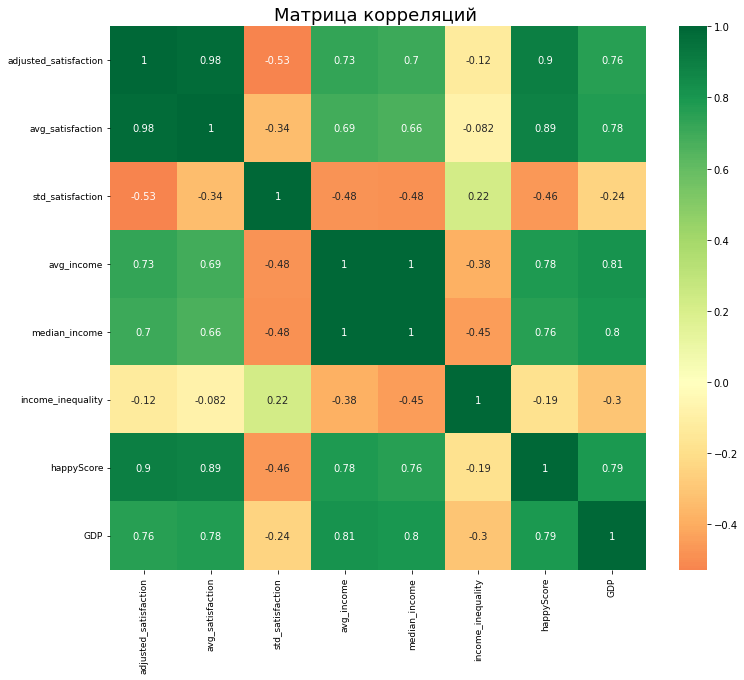

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Матрица корреляций ', fontsize=18)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [27]:
model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(data.drop(['happyScore', 'country', 'region'], axis=1), data['happyScore'], test_size = 0.3)
model.fit(x_train, y_train)

LinearRegression()

In [28]:
w0 = model.intercept_
w = model.coef_
print(w0, end = ' ')
x = data.drop(['happyScore', 'country', 'region'], axis = 1).columns
for i in range(w.shape[0]):
  print(f'+ {w[i]} {x[i]}', end = ' ')
# По уравнению видно, что коэффиценты признаков  adjusted_satisfaction,
# avg_income, median_income и income_inequality очень малы, 
# поэтому их следует убрать

5.24879423943183 + -0.0972542014086703 adjusted_satisfaction + 1.3262230195133908 avg_satisfaction + -1.3846690255397684 std_satisfaction + 0.00019353416126688394 avg_income + -0.00017789643746046746 median_income + -0.011279754818982862 income_inequality + 0.10176348175868376 GDP 

In [30]:
new_model = LinearRegression()
new_model.fit(x_train.drop(["adjusted_satisfaction", "avg_income", "median_income", "income_inequality"], axis=1), y_train)

w0 = new_model.intercept_
w = new_model.coef_
print(w0, end = ' ')
x = data.drop(['happyScore', 'country', 'region', "adjusted_satisfaction", "avg_income", "median_income", "income_inequality"], axis = 1).columns
for i in range(w.shape[0]):
  print(f'+ {w[i]} {x[i]}', end = ' ')

3.4483802580125706 + 0.5222946622213006 avg_satisfaction + -0.8325655911342836 std_satisfaction + 0.7566484115378348 GDP 

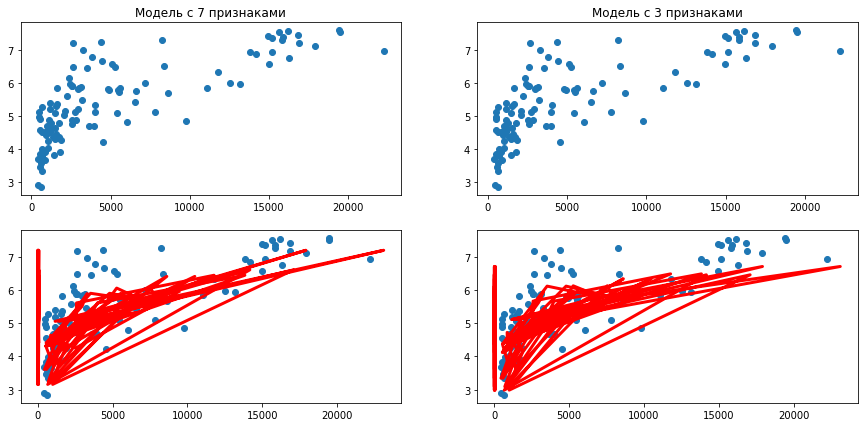

In [40]:
y_pred = model.predict(x_test)
new_y_pred = new_model.predict(x_test.drop(["adjusted_satisfaction", "avg_income", "median_income", "income_inequality"], axis=1))

fig, ax = plt.subplots(2, 2)

ax[0][0].set_title("Модель с 7 признаками")
ax[0][1].set_title("Модель с 3 признаками")
ax[0][0].scatter(data['median_income'], data['happyScore'])
ax[0][1].scatter(data['median_income'], data['happyScore'])

fig.set_figheight(7)
fig.set_figwidth(15)

ax[1][0].scatter(np.array(data['median_income']).reshape((-1,1)), np.array(data['happyScore']))
ax[1][0].plot(x_test , y_pred, color="red", linewidth=3)
ax[1][1].scatter(np.array(data['median_income']).reshape((-1,1)), np.array(data['happyScore']))
ax[1][1].plot(x_test, new_y_pred, color="red", linewidth=3)
plt.show()

plt.show()

In [42]:
print('Модель с 7 признаками')
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))
print('\n')
print('Модель с 3 признаками')
print('Mean Absolute Error:', mean_absolute_error(y_test, new_y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, new_y_pred))
print('R2 score:', r2_score(y_test, new_y_pred))

# Из полученных значений MAE, MSE и R2 видно, что
# обе модели сработали хорошо(но 2-ая особено)
# по причине наличия линейной зависимости между
# Счастьем людей и их удовлетворенностью(кто бы мог подумать)
# и отсутствия линейной зависимости между счастьем и
# доходами

Модель с 7 признаками
Mean Absolute Error: 0.44774588606397825
Mean Squared Error: 0.2847084619482914
R2 score: 0.7827528980078211


Модель с 3 признаками
Mean Absolute Error: 0.4595694857701549
Mean Squared Error: 0.28217211872473397
R2 score: 0.7846882574671246
